## Tutorial 7

- Keras
- Multi-processing/-threading

### Keras

- Keras is a deep learning API capable of running on top of either *JAX, TensorFlow, or PyTorch*.
- Keras is now officially part of TensorFlow: As of TensorFlow 2.0, Keras is tightly integrated with TensorFlow and is available as `tf.keras`

In [ ]:
import pandas as pd
from tensorflow import keras

In [ ]:
# ref: https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

df = pd.read_csv('pima-indians-diabetes.csv', header=None)

df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
X = df.values[:, 0:8]
y = df.values[:, 8]

print(f"Shape of X: {X.shape}")

Shape of X: (768, 8)


In [ ]:
# define the keras model
model = keras.Sequential()
model.add(keras.layers.Input(shape=(8,)))
model.add(keras.layers.Dense(12, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
# compile the keras model with loss function, optimizer and evaluation metrics
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit (train) the keras model on the dataset
model.fit(X, y, epochs=150, batch_size=10)
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print(f"accuracy: {accuracy*100:.2f}")

Epoch 1/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5897 - loss: 4.0678
Epoch 2/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6396 - loss: 1.7270
Epoch 3/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6321 - loss: 1.2107
Epoch 4/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6585 - loss: 1.0249
Epoch 5/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6755 - loss: 0.8445
Epoch 6/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6883 - loss: 0.7166
Epoch 7/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6908 - loss: 0.7343
Epoch 8/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6735 - loss: 0.7394
Epoch 9/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6753 - loss: 0.6942
Epoch 10/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6789 - loss: 0.7173
Epoch 11/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6811 - loss: 0.6468
Epoch 12/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

In [ ]:
# 1. Use `Sequential`: easy, but only if the model structure is linear
## 1.1 instantiate empty `Sequential`, and then `add` layers into it
model = keras.Sequential()
model.add(keras.Input(shape=(8,)))
model.add(keras.layers.Dense(12, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

## 1.2 instantiate `Sequantial` with layers
model = keras.Sequential([
    keras.Input(shape=(8,)),
    keras.layers.Dense(12, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# 2. define a subclass of keras.Model: more flexible
class MyModel(keras.Model):
    def __init__(self):
        super().__init__()
        self.dense1 = keras.layers.Dense(12, activation='relu')
        self.dense2 = keras.layers.Dense(8, activation='relu')
        self.out = keras.layers.Dense(1, activation='sigmoid')

    def call(self, x):
        x = self.dense1(x)
        x = self.dense2(x)
        out = self.out(x)
        return out

# 3. with functional API: start from Input, chain layer calls, and finally, create your model from inputs and outputs
inputs = keras.Input(shape=(8,))
x = keras.layers.Dense(12, activation="relu")(inputs)
x = keras.layers.Dense(8, activation='relu')(x)
outputs = keras.layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

### Understanding the interface

- Sequential.add(layer, rebuild=True)
    - Adds a layer instance on top of the layer stack.


- Model.compile

```python
Model.compile(
    optimizer="rmsprop",
    loss=None,
    loss_weights=None,
    metrics=None,
    weighted_metrics=None,
    run_eagerly=False,
    steps_per_execution=1,
    jit_compile="auto",
    auto_scale_loss=True,
)
```
- Parameters:
    - **optimizer**: String (name of optimizer) or `keras.optimizers` instance
    - **loss**: String (name of loss function), or `keras.losses.Loss` instance
    - **metrics**: List of metrics to be evaluated by the model during training and testing.


- Model.fit

```python
Model.fit(
    x=None,
    y=None,
    batch_size=None,
    epochs=1,
    verbose="auto",
    callbacks=None,
    validation_split=0.0,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
)
```

## **InClass Practice**

- Use the `california_housing` dataset

- Define a neural network with hidden layers `Dense(256)` + `Dense(128)` + `Dense(64)` + `Dense(32)` + `Dense(16)` + use `relu` as my outcome activation

- Use the loss function `mean_absolute_error`

- Report `RootMeanSquaredError` and `MeanAbsolutePercentageError` in each iteration

- Plot the training history of `MeanAbsolutePercentageError`

- Make prediction for `X_test`.

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# 1. Use the california_housing dataset
california_housing = fetch_california_housing(as_frame=True)
X, y = california_housing.data.values, california_housing.target.values

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# 2. Define a neural network with hidden layers Dense(256) + Dense(128) + Dense(64) + Dense(32) + Dense(16)

class MLP(keras.Model):
    def __init__(self):
        super().__init__()
        self.backbone = keras.Sequential([
            keras.layers.Dense(256, activation='relu'),
            keras.layers.Dense(128, activation='relu'),
            keras.layers.Dense(64, activation='relu'),
            keras.layers.Dense(32, activation='relu'),
            keras.layers.Dense(16, activation='relu'),
        ])
        self.out = keras.layers.Dense(1)

    def call(self, x):
        x = self.backbone(x)
        out = self.out(x)
        return out

In [ ]:
# 3. Compile model
# Use the loss function mean_absolute_error
# Set metric as mean_absolute_percentage_error

model.compile(
    loss='mean_absolute_error',
    optimizer='sgd',
    metrics=['mean_absolute_percentage_error']
)

In [ ]:
# 4. Model training
## use EarlyStopping to prevent overfitting
## use validation_split

callbacks = [
    keras.callbacks.EarlyStopping(monitor="mean_absolute_error", mode='min', patience=10)
]
his = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    validation_freq=1,
    epochs=20,
    callbacks=callbacks,
)

Epoch 1/50
362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1722 - mean_absolute_percentage_error: 47.3460 - val_loss: 1.1500 - val_mean_absolute_percentage_error: 46.6238
Epoch 2/50
 72/362 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1072 - mean_absolute_percentage_error: 46.4356

/usr/local/lib/python3.12/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `mean_absolute_error` which is not available. Available metrics are: loss,mean_absolute_percentage_error,val_loss,val_mean_absolute_percentage_error
  current = self.get_monitor_value(logs)


362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1391 - mean_absolute_percentage_error: 47.2253 - val_loss: 1.1500 - val_mean_absolute_percentage_error: 46.6238
Epoch 3/50
362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1436 - mean_absolute_percentage_error: 47.2646 - val_loss: 1.1500 - val_mean_absolute_percentage_error: 46.6238
Epoch 4/50
362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1497 - mean_absolute_percentage_error: 46.8930 - val_loss: 1.1500 - val_mean_absolute_percentage_error: 46.6238
Epoch 5/50
362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1378 - mean_absolute_percentage_error: 46.9093 - val_loss: 1.1500 - val_mean_absolute_percentage_error: 46.6238
Epoch 6/50
362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1559 - mean_absolute_percentage_error: 47.4081 - val_loss: 1.1500 - val_mean_absolute_percentage_error: 46.6238
Epoch 7/50
362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1491 - mean_absolute_percentage_error: 46.9927 - val_loss: 1.1500 - val_mean_ab

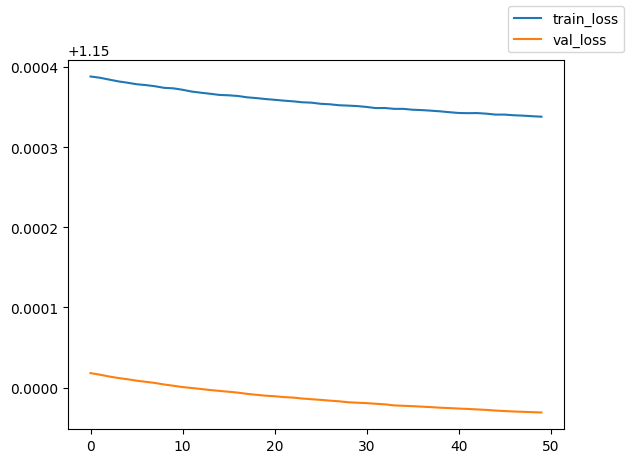

In [ ]:
# 5. Plot training log/history

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(his.history['loss'], label='train_loss')
ax.plot(his.history['val_loss'], label='val_loss')
fig.legend()

### Multi-processing/-threading

- Multi-threading: Running multiple threads (smaller units of a process) within the same process to achieve concurrency, especially useful for I/O-bound tasks.

- Multi-processing: Running multiple processes (completely separate Python interpreter instances) to fully utilize multiple CPUs. Ideal for CPU-bound tasks due to the ***Global Interpreter Lock (GIL)*** limitation in Python.

#### Multi-threading

**When to Use?**

When your program spends a lot of time waiting for external resources (disk, network, user input).


In [ ]:
import threading
import time

def io_intensive_worker(number):
    print(f"Thread {number}: starting")
    time.sleep(2)  # use sleep to mimic the waiting for reading file from disk, downloading file from network
    print(f"Thread {number}: done")

print(f"Starting all threads")
start_time = time.time()
threads = []
for i in range(5):
    t = threading.Thread(target=io_intensive_worker, args=(i,))
    threads.append(t)
    t.start()

for t in threads:
    t.join()

time_elasped = time.time() - start_time
print(f"All threads finished in {time_elasped}s.")

Starting all threads
Thread 0: starting
Thread 1: starting
Thread 2: starting
Thread 3: starting
Thread 4: starting
Thread 0: done
Thread 1: done
Thread 2: done
Thread 3: done
Thread 4: done
All threads finished in 2.0191826820373535s.


#### multi-processing

**When to Use?**

When your program needs lots of CPU (complex calculations, data processing).

***Run the example with multi-processing in your OWN computer with more CPUs.***

In [ ]:
cores = multiprocessing.cpu_count()
print(f"Number of CPU cores: {cores}")

Number of CPU cores: 2


In [ ]:
import multiprocessing

def heavy_computation():
    sum(i*i for i in range(10**7))


if __name__ == "__main__":
    processes = []
    start_time = time.time()
    for _ in range(4):
        p = multiprocessing.Process(target=heavy_computation)
        p.start()
        processes.append(p)
    for p in processes:
        p.join()
    print(f"Total time with processes: {time.time() - start_time:.2f}s")

Total time with processes: 5.08s


In [ ]:
threads = []
start_time = time.time()
for _ in range(4):
    t = threading.Thread(target=heavy_computation)
    t.start()
    threads.append(t)
for t in threads:
    t.join()
print(f"Total time with threads: {time.time() - start_time:.2f}s")

Total time with threads: 4.23s


In [ ]:
start_time = time.time()
for _ in range(4):
    heavy_computation()
print(f"Total time without parallel: {time.time() - start_time:.2f}")

Total time without parallel: 4.23


roughly same time for multi-threading and sequential

if 4 cpus: multi-processing 3x~4x faster

---



#### ThreadPool and ProcessPool

- Pools are convenient interfaces for managing a group of worker threads or processes.
- Good for distributing independent "jobs" (like tasks in a list) across workers, handling more work with less code.

Using ThreadPoolExecutor (from concurrent.futures)

In [ ]:
from concurrent.futures import ThreadPoolExecutor, as_completed

def fetch_data(x):
    print(f"Thread: working on {x}")
    time.sleep(1)  # Simulate network delay
    return x * 10

input_data = [1, 2, 3, 4, 5]

with ThreadPoolExecutor(max_workers=2) as executor:
    # Submit all jobs, get future objects
    futures = [executor.submit(fetch_data, item) for item in input_data]
    for future in as_completed(futures):
        print("Result:", future.result())

Thread: working on 1
Thread: working on 2
Thread: working on 3Thread: working on 4
Result: 10
Result: 20

Thread: working on 5
Result: 40
Result: 30
Result: 50


In [ ]:
from concurrent.futures import ProcessPoolExecutor

def heavy_computation(x):
    print(f"Process: working on {x}")
    # Do something CPU-intensive
    count = 0
    for i in range(10**6):
        count += i % x
    return x, count

input_data = [2, 3, 4, 5, 6]

if __name__ == "__main__":
    with ProcessPoolExecutor(max_workers=2) as executor:
        futures = [executor.submit(heavy_computation, item) for item in input_data]
        for future in as_completed(futures):
            result = future.result()
            print(f"Result: {result}")

Process: working on 3Process: working on 2

Process: working on 4
Process: working on 5
Process: working on 6
Result: (2, 500000)
Result: (3, 999999)
Result: (4, 1500000)
Result: (5, 2000000)
Result: (6, 2499996)


**map-style Application**

This is helpful when you have lots of data and want results in order:

In [ ]:
from concurrent.futures import ProcessPoolExecutor

def square(x):
    return x ** 2

input_data = list(range(10))
if __name__ == "__main__":
    with ProcessPoolExecutor(max_workers=2) as executor:
        results = list(executor.map(square, input_data))
    print("Squared:", results)

Squared: [0, 1, 4, 9, 16, 25, 36, 49, 64, 81]



## **Table: Comparison**

| Feature          | Multi-threading                | Multi-processing                              |
|------------------|-------------------------------|-----------------------------------------------|
| Memory           | Shared (same process)          | Separate per process                          |
| Communication    | Easier (shared objects/memory) | More complex (needs IPC: Queues/Pipes/etc)    |
| GIL              | Yes, affected                  | No, each process has its own Python interpreter|
| Best for         | I/O-bound tasks                | CPU-bound tasks                               |
| Overhead         | Lower                          | Higher (process startup cost)                 |
